# Styling your plots

## Introduction

Whenever exposing your work to an external audience (like, say, the Kaggle userbase), styling your work is a must. The defaults in `pandas` (and other tools) are rarely exactly right for the message you want to communicate. Tweaking your plot can greatly enhance the communicative power of your visualizations, helping to make your work more impactful.

In this section we'll learn how to style the visualizations we've been creating. Because there are *so many* things you can tweak in your plot, it's impossible to cover everything, so we won't try to be comprehensive here. Instead this section will cover some of the most useful basics: changing figure sizes, colors, and font sizes; adding titles; and removing axis borders.

An important skill in plot styling is knowing how to look things up. Comments like "I have been using Matplotlib for a decade now, and I still have to look most things up" are [all too common](https://youtu.be/aRxahWy-ul8?t=2m42s). If you're styling a `seaborn` plot, the library's [gallery](http://seaborn.pydata.org/examples/) and [API documentation](https://seaborn.pydata.org/api.html) are a great place to find styling options. And for both `seaborn` and `pandas` there is a wealth of information that you can find by looking up "how to do X with Y" on [StackOverflow](https://stackoverflow.com/) (replacing X with what you want to do, and Y with `pandas` or `seaborn`). If you want to change your plot in some way not covered in this brief tutorial, and don't already know what function you need to do it, searching like this is the most efficient way of finding it.

In [1]:
import pandas as pd
reviews = pd.read_csv("winemag-data_first150k.csv.zip", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## Points on style

Recall our bar plot from earlier:

<AxesSubplot:>

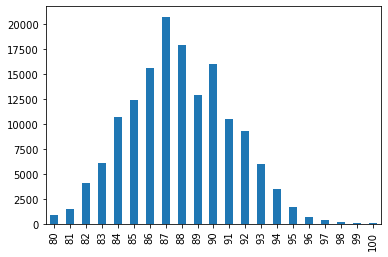

In [2]:
reviews['points'].value_counts().sort_index().plot.bar()

Throughout this section we're going to work on making this plot look nicer.

This plot is kind of hard to see. So make it bigger! We can use the `figsize` parameter to do that.

<AxesSubplot:>

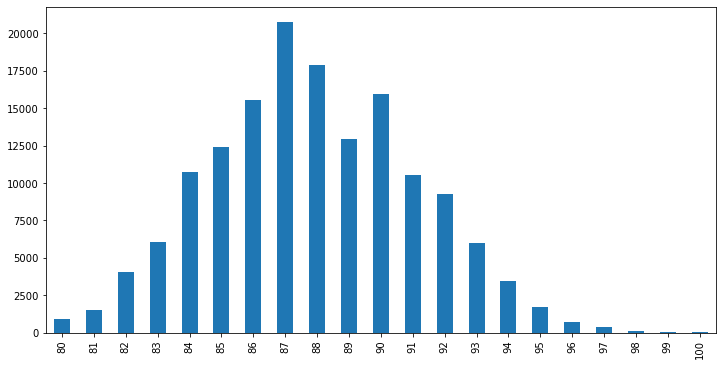

In [3]:
reviews['points'].value_counts().sort_index().plot.bar(figsize=(12, 6))

`figsize` controls the size of the image, in inches. It expects a tuple of `(width, height)` values.

Next, we can change the color of the bars to be more thematic, using the `color` parameter.

<AxesSubplot:>

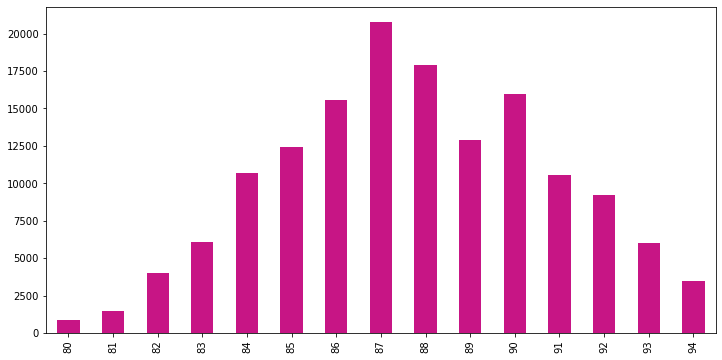

In [3]:
reviews['points'][reviews['points']<95].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred'
)

The text labels are very hard to read at this size. They fit the plot when our plot was very small, but now that the plot is much bigger we need much bigger labels. We can used `fontsize` to adjust this.

<AxesSubplot:>

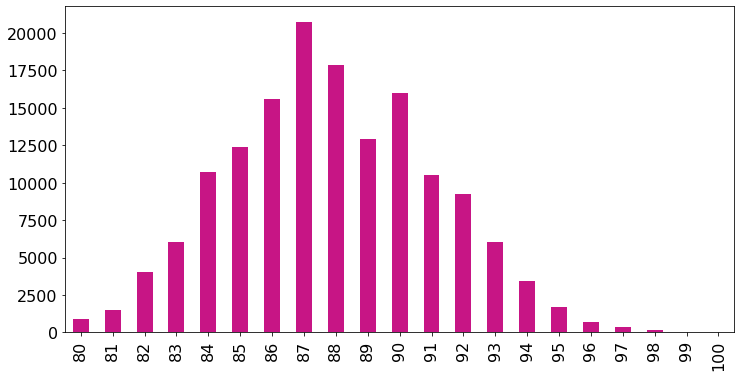

In [5]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)

We also need a `title`.

<AxesSubplot:title={'center':'Rankings Given by Wine Magazine'}>

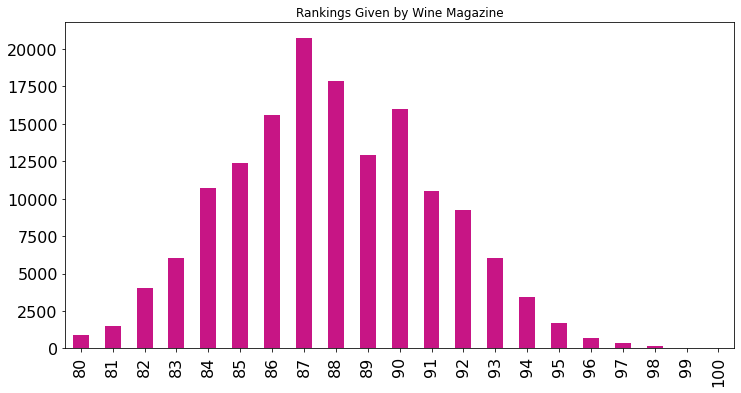

In [6]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16,
    title='Rankings Given by Wine Magazine',
)

However, this title is too small. Unfortunately, `pandas` doesn't give us an easy way of adjusting the title size.

Under the hood, `pandas` data visualization tools are built on top of another, lower-level graphics library called `matplotlib`. Anything that you build in `pandas` can be built using `matplotlib` directly. `pandas` merely make it easier to get that work done.

`matplotlib` *does* provide a way of adjusting the title size. Let's go ahead and do it that way, and see what's different:

Text(0.5, 1.0, 'Rankings Given by Wine Magazine')

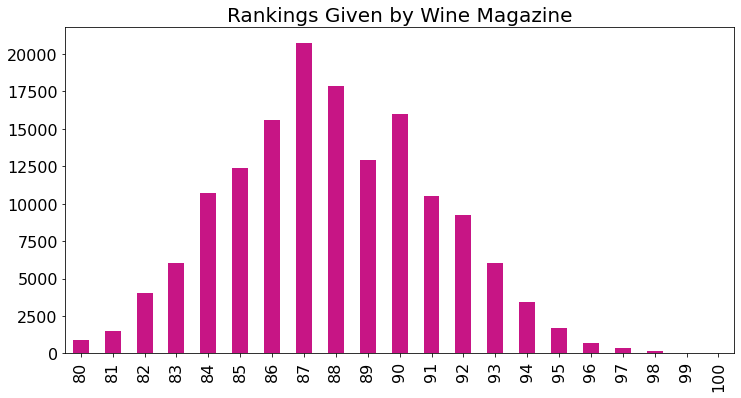

In [7]:
import matplotlib.pyplot as plt

ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)
ax.set_title("Rankings Given by Wine Magazine", fontsize=20)

In the cell immediately above, all we've done is grabbed that object, assigned it to the variable `ax`, and then called `set_title` on `ax`. The `ax.set_title` method makes it easy to change the fontsize; the `title=` keyword parameter in the `pandas` library does not.

`seaborn`, covered in a separate section of the tutorial, *also* uses `matplotlib` under the hood. This means that the tricks above work there too. `seaborn` has its own tricks, too&mdash;for example, we can use the very convenient `sns.despine` method to turn off the ugly black border.

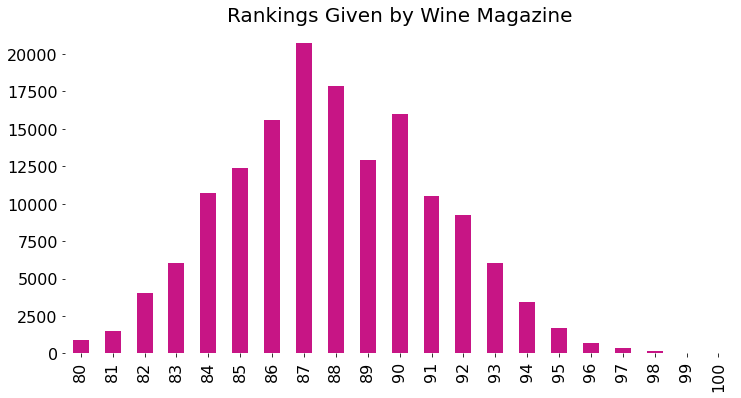

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)
ax.set_title("Rankings Given by Wine Magazine", fontsize=20)
sns.despine(bottom=True, left=True)

Prefect. This graph is more clearer than what we started with; it will do a much better job communicating the analysis to our readers.

There are many, many more things that you can do than just what we've shown here. Different plots provide different styling options: `color` is almost universal for example, while `s` (size) only makes sense in a scatterplot. For now, the operations we've shown here are enough to get you started.

# Exercises

To put your design skills to the test, try forking this notebook and replicating the plots that follow. To see the answers, hit the "Input" button below to un-hide the code.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokemon = pd.read_csv("Pokemon2.csv")
pokemon.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


<AxesSubplot:title={'center':'Pokemon by Attack and Defense'}, xlabel='Attack', ylabel='Defense'>

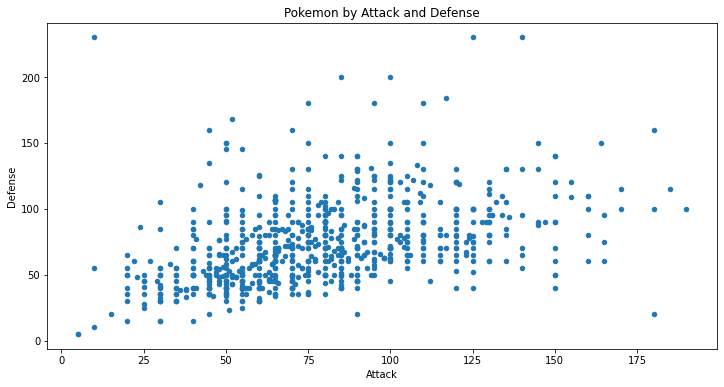

In [10]:
pokemon.plot.scatter(x='Attack', y='Defense',
                     figsize=(12, 6),
                     title='Pokemon by Attack and Defense')

Text(0.5, 1.0, 'Pokemon by Stat Total')

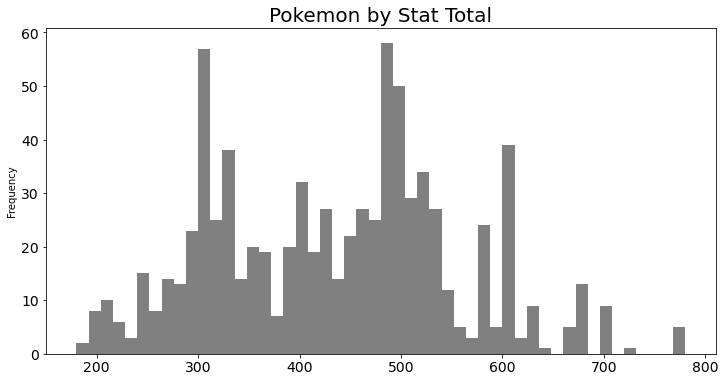

In [11]:
ax = pokemon['Total'].plot.hist(
    figsize=(12, 6),
    fontsize=14,
    bins=50,
    color='gray'
)
ax.set_title('Pokemon by Stat Total', fontsize=20)

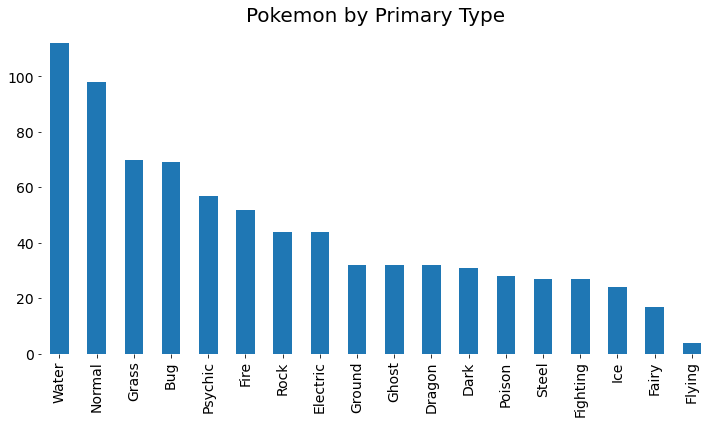

In [12]:
ax = pokemon['Type 1'].value_counts().plot.bar(
    figsize=(12, 6),
    fontsize=14
)
ax.set_title("Pokemon by Primary Type", fontsize=20)
sns.despine(bottom=True, left=True)

# Conclusion

In this section of the tutorial, we learned a few simple tricks for making our plots more visually appealing, and hence, more communicative. We also learned that there is another plotting library, `matplotlib`, which lies "underneath" the `pandas` data visualization tools, and which we can use to more finely manipulate our plots.

In the next section we will learn to compose plots together using a technique called subplotting.

[Click here to go to the next section, "Subplots"](https://www.kaggle.com/residentmario/subplots).